# Preprocessed Videos EDA [v3]

### Contents

- Check the landmark extremes
- Explore the none frames
- Checking some things are consistent before and after preprocessing
- Explore the none frames

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns
import vizualisation as viz
import video_analyzer as va

2025-04-22 20:59:24.623840: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745323164.821395    4849 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745323164.875153    4849 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-22 20:59:25.406082: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
path_to_root = '/home/ben/projects/SaoPauloBrazilChapter_BrazilianSignLanguage/'

In [4]:
timestamp = "04142025"
motion_version = "versionB"
pose_version = "versionB"
preprocess_version = "v3"

In [5]:
metadata = pd.read_csv(path_to_root + '/data/preprocessed/preprocessed_metadata_'+preprocess_version+'.csv')

In [6]:
i = 0
metadata_row = metadata.iloc[i].copy()
raw_landmarks_path = path_to_root + f'/data/interim/RawPoseLandmarks/{pose_version}/{metadata_row["filename"].replace(".mp4", ".npy")}'
preprocessed_landmarks_path = path_to_root + f'/data/preprocessed/landmarks/{preprocess_version}/{metadata_row["filename"].replace(".mp4", ".npy")}'
video_path = path_to_root + f'/data/interim/RawCleanVideos/{metadata_row["filename"]}'
metadata_row

filename                  ajudar_sb_2.mp4
label                              ajudar
data_source                            sb
original_fps                     29.97003
original_width                       1280
original_height                       720
original_frame_count                   79
original_duration_sec            2.635967
original_start_frame                    8
original_end_frame                     66
processed_frame_count                  59
processed_duration_sec           1.968633
x_scale                          1.796066
y_scale                           1.26527
x_offset                           -0.003
y_offset                           -0.014
preprocess_version                     v3
Name: 0, dtype: object

In [51]:
raw_landmarks = np.load(raw_landmarks_path, allow_pickle=True)
preprocessed_landmarks = np.load(preprocessed_landmarks_path, allow_pickle=True)

In [29]:
va.validate_landmarks_format(raw_landmarks)

(False,
 ['Invalid length for pose_landmarks in frame 0: expected 23, got 33',
  'Invalid length for pose_landmarks in frame 1: expected 23, got 33',
  'Invalid length for pose_landmarks in frame 2: expected 23, got 33',
  'Invalid length for pose_landmarks in frame 3: expected 23, got 33',
  'Invalid length for pose_landmarks in frame 4: expected 23, got 33',
  'Invalid length for pose_landmarks in frame 5: expected 23, got 33',
  'Invalid length for pose_landmarks in frame 6: expected 23, got 33',
  'Invalid length for pose_landmarks in frame 7: expected 23, got 33',
  'Invalid length for pose_landmarks in frame 8: expected 23, got 33',
  'Invalid length for pose_landmarks in frame 9: expected 23, got 33',
  'Invalid length for pose_landmarks in frame 10: expected 23, got 33',
  'Invalid length for pose_landmarks in frame 11: expected 23, got 33',
  'Invalid length for pose_landmarks in frame 12: expected 23, got 33',
  'Invalid length for pose_landmarks in frame 13: expected 23, got

In [30]:
raw_reduced = va.reduce_landmarks(raw_landmarks)

In [31]:
va.validate_landmarks_format(raw_reduced)

(True, [])

In [35]:
24332/44

553.0

In [42]:
va.analyze_none_landmarks(raw_reduced)

{'overall': {'total_frames': 44,
  'none_frames': 0,
  'total_landmarks': 23892,
  'none_landmarks': 861,
  'none_percentage': 3.6037167252636864},
 'face_landmarks': {'total_landmarks': 21032,
  'none_landmarks': 0,
  'percentage': 0.0,
  'continuous': True,
  'first_valid': 0,
  'last_valid': 43,
  'valid_range_total': 20592,
  'valid_range_none': 0,
  'valid_range_percentage': 0.0,
  'valid_range_none_details': {}},
 'pose_landmarks': {'total_landmarks': 1012,
  'none_landmarks': 0,
  'percentage': 0.0,
  'continuous': True,
  'first_valid': 0,
  'last_valid': 43,
  'valid_range_total': 1012,
  'valid_range_none': 0,
  'valid_range_percentage': 0.0,
  'valid_range_none_details': {}},
 'left_hand_landmarks': {'total_landmarks': 924,
  'none_landmarks': 441,
  'percentage': 47.72727272727273,
  'continuous': True,
  'first_valid': 10,
  'last_valid': 32,
  'valid_range_total': 483,
  'valid_range_none': 0,
  'valid_range_percentage': 0.0,
  'valid_range_none_details': {}},
 'right_han

In [47]:
raw_reduced[30]['right_hand_landmarks']

landmark {
  x: 0.537583709
  y: 0.683986306
  z: 1.94542423e-07
}
landmark {
  x: 0.571125686
  y: 0.643577218
  z: 0.00188523286
}
landmark {
  x: 0.588722348
  y: 0.590893626
  z: 0.00261221104
}
landmark {
  x: 0.600261211
  y: 0.550807059
  z: 0.000283474656
}
landmark {
  x: 0.605192959
  y: 0.515514195
  z: -0.0015173892
}
landmark {
  x: 0.55342561
  y: 0.549221516
  z: 0.0119266286
}
landmark {
  x: 0.570960283
  y: 0.511399806
  z: 0.00263857096
}
landmark {
  x: 0.592154324
  y: 0.495149672
  z: -0.00671659224
}
landmark {
  x: 0.608042657
  y: 0.49017188
  z: -0.0123279095
}
landmark {
  x: 0.544015825
  y: 0.55377239
  z: 0.0053498121
}
landmark {
  x: 0.566664338
  y: 0.515320659
  z: -0.00146783877
}
landmark {
  x: 0.58985126
  y: 0.506331205
  z: -0.00796121079
}
landmark {
  x: 0.607633591
  y: 0.506670713
  z: -0.0122631555
}
landmark {
  x: 0.539448261
  y: 0.563304484
  z: -0.0028448971
}
landmark {
  x: 0.56480509
  y: 0.52788043
  z: -0.00918466598
}
landmark {
 

In [48]:
raw_reduced[31]['right_hand_landmarks']

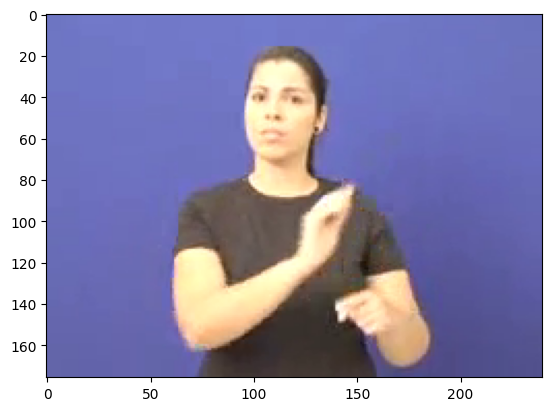

In [53]:
frame = viz.get_frame(30, video_path)
plt.imshow(frame);

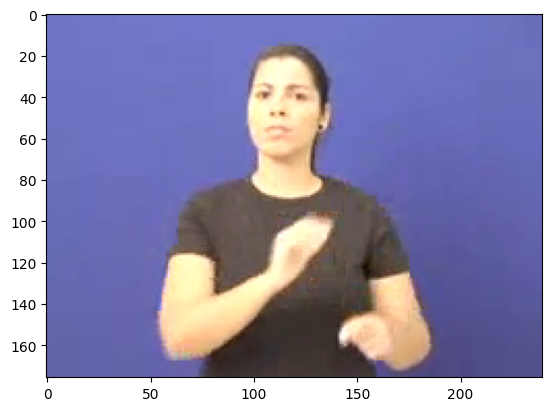

In [54]:
frame = viz.get_frame(31, video_path)
plt.imshow(frame);

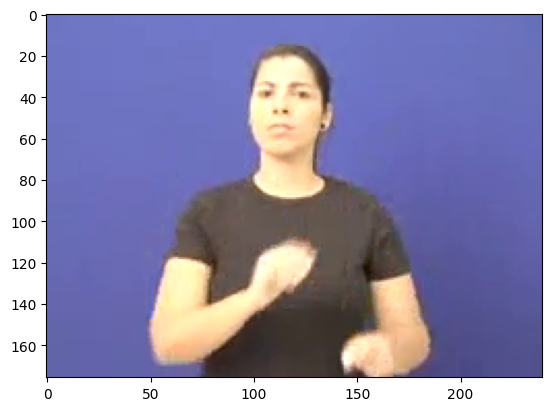

In [55]:
frame = viz.get_frame(32, video_path)
plt.imshow(frame);

In [10]:
from typing import Dict, List
def validate_landmarks(results: Dict) -> Dict[str, bool]:
    """
    Validate that all expected landmarks exist and have the correct structure.
    
    Args:
        results: Dictionary containing MediaPipe Holistic detection results
    
    Returns:
        Dictionary indicating which landmark sets are valid and complete
    """
    validation = {
        'face_landmarks': False,
        'pose_landmarks': False,
        'left_hand_landmarks': False,
        'right_hand_landmarks': False,
        'pose_world_landmarks': False
    }
    
    # Check face landmarks
    if 'face_landmarks' in results and results['face_landmarks'] is not None:
        if hasattr(results['face_landmarks'], 'landmark'):
            landmarks = results['face_landmarks'].landmark
            validation['face_landmarks'] = len(landmarks) == 468  # MediaPipe face has 468 landmarks
    
    # Check pose landmarks
    if 'pose_landmarks' in results and results['pose_landmarks'] is not None:
        if hasattr(results['pose_landmarks'], 'landmark'):
            landmarks = results['pose_landmarks'].landmark
            validation['pose_landmarks'] = len(landmarks) == 33  # MediaPipe pose has 33 landmarks
    
    # Check left hand landmarks
    if 'left_hand_landmarks' in results and results['left_hand_landmarks'] is not None:
        if hasattr(results['left_hand_landmarks'], 'landmark'):
            landmarks = results['left_hand_landmarks'].landmark
            validation['left_hand_landmarks'] = len(landmarks) == 21  # MediaPipe hand has 21 landmarks
    
    # Check right hand landmarks
    if 'right_hand_landmarks' in results and results['right_hand_landmarks'] is not None:
        if hasattr(results['right_hand_landmarks'], 'landmark'):
            landmarks = results['right_hand_landmarks'].landmark
            validation['right_hand_landmarks'] = len(landmarks) == 21  # MediaPipe hand has 21 landmarks
    
    # Check pose world landmarks
    if 'pose_world_landmarks' in results and results['pose_world_landmarks'] is not None:
        if hasattr(results['pose_world_landmarks'], 'landmark'):
            landmarks = results['pose_world_landmarks'].landmark
            validation['pose_world_landmarks'] = len(landmarks) == 33  # MediaPipe pose world has 33 landmarks
    
    return validation

# Example usage:
def check_landmarks_in_video(results_list: List[Dict]) -> Dict[str, Dict[str, int]]:
    """
    Check landmark presence across all frames in a video.
    
    Args:
        results_list: List of landmark detection results for each frame
    
    Returns:
        Dictionary containing statistics about landmark presence:
        {
            'face_landmarks': {'present': int, 'missing': int},
            'pose_landmarks': {'present': int, 'missing': int},
            'left_hand_landmarks': {'present': int, 'missing': int},
            'right_hand_landmarks': {'present': int, 'missing': int},
            'pose_world_landmarks': {'present': int, 'missing': int}
        }
    """
    stats = {
        'face_landmarks': {'present': 0, 'missing': 0},
        'pose_landmarks': {'present': 0, 'missing': 0},
        'left_hand_landmarks': {'present': 0, 'missing': 0},
        'right_hand_landmarks': {'present': 0, 'missing': 0},
        'pose_world_landmarks': {'present': 0, 'missing': 0}
    }
    
    for results in results_list:
        validation = validate_landmarks(results)
        for landmark_type, is_valid in validation.items():
            if is_valid:
                stats[landmark_type]['present'] += 1
            else:
                stats[landmark_type]['missing'] += 1
    
    return stats

# Example usage with your results:
# validation = validate_landmarks(results)  # For a single frame
# stats = check_landmarks_in_video(results_list)  # For a video

In [30]:
lower_body_indices

[23, 24, 25, 26, 27, 28, 29, 30, 31, 32]

0.37838390469551086
0.477914422750473
0.4591315984725952
0.4922551214694977


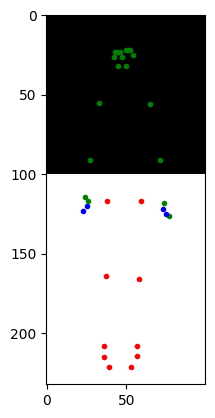

In [24]:
visibility = []
visibility_keep = []
visibility_remove = []
lower_body_indices = list(range(23, 33))
other_indices = list(range(18, 22))
frame = np.zeros((100, 100, 3))
plt.imshow(frame);
for i, lm in enumerate(raw_landmarks[0]['pose_landmarks'].landmark):
    visibility.append(lm.visibility)
    if i in lower_body_indices:
        visibility_remove.append(lm.visibility)
        plt.plot(int(lm.x*100), int(lm.y*100), 'r.')
    elif i in other_indices:
        print(lm.visibility)
        visibility_keep.append(lm.visibility)
        plt.plot(int(lm.x*100), int(lm.y*100), 'b.')
    else:
        visibility_keep.append(lm.visibility)
        plt.plot(int(lm.x*100), int(lm.y*100), 'g.')

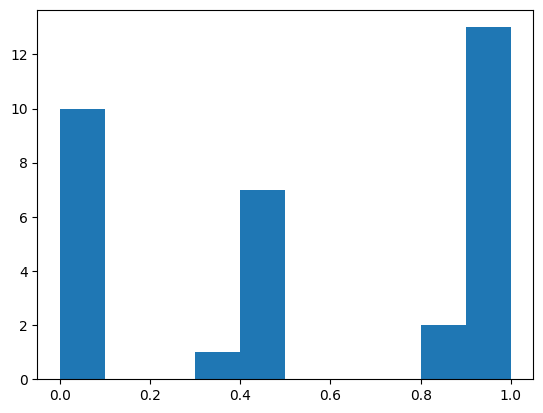

In [20]:
plt.hist(visibility);

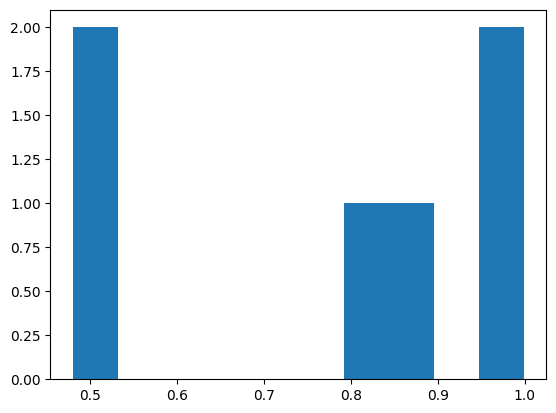

In [22]:
plt.hist(visibility_keep);

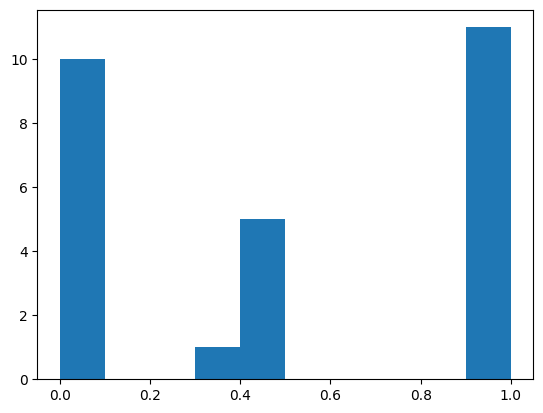

In [23]:
plt.hist(visibility_remove);

In [22]:
validate_landmarks(raw_landmarks[0])

{'face_landmarks': False,
 'pose_landmarks': True,
 'left_hand_landmarks': False,
 'right_hand_landmarks': False,
 'pose_world_landmarks': True}

In [30]:
len(raw_landmarks[0]['face_landmarks'].landmark)

478

In [44]:
len(raw_landmarks[30]['left_hand_landmarks'].landmark)

21

In [ ]:
raw_landmarks[0]['left_hand_landmarks']

In [46]:
for i in range(len(raw_landmarks)):
    #left 
    if raw_landmarks[i]['left_hand_landmarks'] is not None:
        left_len = len(raw_landmarks[i]['left_hand_landmarks'].landmark)
    else:
        left_len = 0
    #right
    if raw_landmarks[i]['right_hand_landmarks'] is not None:
        right_len = len(raw_landmarks[i]['right_hand_landmarks'].landmark)
    else:
        right_len = 0
    print(left_len, right_len) 


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
21 21
21 21
21 21
21 21
21 21
21 21
21 21
21 21
21 21
21 21
21 21
21 21
21 21
21 21
21 21
21 21
21 21
21 21
21 21
21 21
21 21
21 0
21 21
0 21
0 21
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


In [33]:
for i in range(len(raw_landmarks)):
    print(len(raw_landmarks[i]['face_landmarks'].landmark))


478
478
478
478
478
478
478
478
478
478
478
478
478
478
478
478
478
478
478
478
478
478
478
478
478
478
478
478
478
478
478
478
478
478
478
478
478
478
478
478
478
478
478
478
